In [1]:
%matplotlib inline
import pandas as pd
from pandas import DataFrame, Series
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from scipy import stats
import sys

In [5]:
matrixMalEX="data_GG.csv"
matrixMal="data_GM.csv"
matrixIt="data_L.csv"
n_qty=2 #CAMBIAR SEGUN LA CANTIDAD DE NODOS USADOS
n_groups= 2
repet = 3 #CAMBIAR EL PRIMER NUMERO SEGUN NUMERO DE EJECUCIONES POR CONFIG

p_value = 0.05
values = [2, 10, 20, 40]
dist_names = ['null', 'BestFit', 'WorstFit']

labelsP = [['(2,2)', '(2,10)', '(2,20)', '(2,40)'],['(10,2)', '(10,10)', '(10,20)', '(10,40)'],
          ['(20,2)', '(20,10)', '(20,20)', '(20,40)'],['(40,2)', '(40,10)', '(40,20)', '(40,40)']]
labelsP_J = ['(2,2)', '(2,10)', '(2,20)', '(2,40)','(10,2)', '(10,10)', '(10,20)', '(10,40)',
              '(20,2)', '(20,10)', '(20,20)', '(20,40)','(40,2)', '(40,10)', '(40,20)', '(40,40)']
positions = [321, 322, 323, 324, 325]
positions_small = [221, 222, 223, 224]

In [84]:
dfG = pd.read_csv( matrixMalEX )

dfG = dfG.drop(columns=dfG.columns[0])
dfG['S'] = dfG['N']
dfG['N'] = dfG['S'] + dfG['%Async']
dfG['%Async'] = (dfG['%Async'] / dfG['N']) * 100

if(n_qty == 1):
    group = dfG.groupby(['%Async', 'Groups'])['TE']
else:        
    group = dfG.groupby(['Dist', '%Async', 'Groups'])['TE']

#group
grouped_aggG = group.agg(['mean'])
grouped_aggG.rename(columns={'mean':'TE',}, inplace=True)

In [85]:
dfM = pd.read_csv( matrixMal )
dfM = dfM.drop(columns=dfM.columns[0])

dfM['S'] = dfM['N']
dfM['N'] = dfM['S'] + dfM['%Async']
dfM["TR"] = dfM["TC"] + dfM["TS"] + dfM["TA"]
dfM['%Async'] = (dfM['%Async'] / dfM['N']) * 100

if(n_qty == 1):
    groupM = dfM.groupby(['%Async','NP', 'NS'])['TC', 'TS', 'TA', 'TR']
else:
    groupM = dfM.groupby(['Dist', '%Async','NP', 'NS'])['TC', 'TS', 'TA', 'TR']

#group
grouped_aggM = groupM.agg(['mean'])
grouped_aggM.columns = grouped_aggM.columns.get_level_values(0)

In [86]:
dfL = pd.read_csv( matrixIt )
dfL = dfL.drop(columns=dfL.columns[0])

if(n_qty == 1):
    groupL = dfL[dfL['NS'] != 0].groupby(['Tt', '%Async', 'NP', 'NS'])['Ti', 'To']
else:
    groupL = dfL[dfL['NS'] != 0].groupby(['Tt', 'Dist', '%Async', 'NP', 'NS'])['Ti', 'To']

#group
grouped_aggL = groupL.agg(['mean', 'count'])
grouped_aggL.columns = grouped_aggL.columns.get_level_values(0)
grouped_aggL.set_axis(['Ti', 'Iters', 'To', 'Iters2'], axis='columns')

grouped_aggL['Iters'] = np.round(grouped_aggL['Iters']/repet)
grouped_aggL['Iters2'] = np.round(grouped_aggL['Iters2']/repet)

/home/usuario/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: FutureWarning: set_axis currently defaults to operating inplace.
This will change in a future version of pandas, use inplace=True to avoid this warning.
  if sys.path[0] == '':


In [87]:
grouped_aggL.to_excel("resultL.xlsx") 
grouped_aggM.to_excel("resultM.xlsx") 
grouped_aggG.to_excel("resultG.xlsx") 

In [88]:
dfG

N  %Async Groups Dist  Matrix  CommTam  Time Iters        TE  \
0    1000000000     0.0  20,40  2,2  100000        0   0.2  1,10  4.652589   
1    1000000000     0.0  20,40  2,2  100000        0   0.2  1,10  5.018492   
2    1000000000     0.0  20,40  2,2  100000        0   0.2  1,10  4.493219   
3    1000000000    75.0  10,40  1,1  100000        0   0.2  1,10  4.105919   
4    1000000000    75.0  10,40  1,1  100000        0   0.2  1,10  4.245686   
..          ...     ...    ...  ...     ...      ...   ...   ...       ...   
475  1000000000    50.0  10,10  2,2  100000        0   0.2  1,10  2.962400   
476  1000000000    50.0  10,10  2,2  100000        0   0.2  1,10  2.961127   
477  1000000000    50.0  40,20  1,1  100000        0   0.2  1,10  4.608352   
478  1000000000    50.0  40,20  1,1  100000        0   0.2  1,10  4.589667   
479  1000000000    50.0  40,20  1,1  100000        0   0.2  1,10  4.489824   

              S  
0    1000000000  
1    1000000000  
2    1000000000  
3     250000000  
4     250000000  
..          ...  
475   500000000  
476   500000000  
477   500000000  
478   500000000  
479   500000000  

[480 rows x 10 columns]

In [89]:
grouped_aggG

TE
Dist %Async Groups          
1,1  0.0    10,10   2.627098
            10,2    2.899689
            10,20   2.888230
            10,40   3.993755
            2,10    2.944463
...                      ...
2,2  100.0  20,40   5.341889
            40,10   4.388462
            40,2    4.029106
            40,20   5.118012
            40,40   5.099804

[160 rows x 1 columns]

In [90]:
dfM

N  %Async  NP  NS Dist  Matrix  CommTam  Time Iters        TC  \
0    1000000000     0.0  20  40  2,2  100000        0   0.2  1,10  1.386783   
1    1000000000     0.0  20  40  2,2  100000        0   0.2  1,10  1.451572   
2    1000000000     0.0  20  40  2,2  100000        0   0.2  1,10  1.268700   
3    1000000000    75.0  10  40  1,1  100000        0   0.2  1,10  1.229340   
4    1000000000    75.0  10  40  1,1  100000        0   0.2  1,10  1.282071   
..          ...     ...  ..  ..  ...     ...      ...   ...   ...       ...   
475  1000000000    50.0  10  10  2,2  100000        0   0.2  1,10  0.552342   
476  1000000000    50.0  10  10  2,2  100000        0   0.2  1,10  0.559686   
477  1000000000    50.0  40  20  1,1  100000        0   0.2  1,10  1.062025   
478  1000000000    50.0  40  20  1,1  100000        0   0.2  1,10  1.068324   
479  1000000000    50.0  40  20  1,1  100000        0   0.2  1,10  1.111539   

           TS        TA           S        TR  
0    0.975962  0.000000  1000000000  2.362745  
1    1.287850  0.000000  1000000000  2.739422  
2    0.951857  0.000000  1000000000  2.220557  
3    0.152475  1.039797   250000000  2.421612  
4    0.150512  1.328807   250000000  2.761390  
..        ...       ...         ...       ...  
475  0.086523  0.606111   500000000  1.244976  
476  0.039759  0.584163   500000000  1.183608  
477  0.495980  1.637047   500000000  3.195052  
478  0.476552  1.684447   500000000  3.229323  
479  0.378755  1.518684   500000000  3.008978  

[480 rows x 14 columns]

In [91]:
grouped_aggM

TC        TS        TA        TR
Dist %Async NP NS                                        
1,1  0.0    2  2   0.223021  0.324948  0.000000  0.547969
               10  0.303257  0.441400  0.000000  0.744658
               20  0.471601  0.515365  0.000000  0.986965
               40  1.017589  0.670533  0.000000  1.688121
            10 2   0.281236  0.425874  0.000000  0.707110
...                     ...       ...       ...       ...
2,2  100.0  20 40  1.444816  0.000000  2.211954  3.656770
            40 2   0.440411  0.000000  2.377278  2.817690
               10  0.948845  0.000000  1.783927  2.732773
               20  1.288021  0.000000  2.137097  3.425118
               40  1.442273  0.000000  1.960198  3.402471

[160 rows x 4 columns]

In [92]:
dfL

N  %Async  NP  N_par  NS  Dist  Compute_tam  Comm_tam  Time  \
0     1000000000     0.0  40     20   0     2       100000         0   0.2   
1     1000000000     0.0  40     20   0     2       100000         0   0.2   
2     1000000000     0.0  40     20   0     2       100000         0   0.2   
3     1000000000     0.0  40     20   0     2       100000         0   0.2   
4     1000000000     0.0  40     20   0     2       100000         0   0.2   
...          ...     ...  ..    ...  ..   ...          ...       ...   ...   
5275  1000000000    50.0  20     40   0     1       100000         0   0.2   
5276  1000000000    50.0  20     40   0     1       100000         0   0.2   
5277  1000000000    50.0  20     40   0     1       100000         0   0.2   
5278  1000000000    50.0  20     40   0     1       100000         0   0.2   
5279  1000000000    50.0  20     40   0     1       100000         0   0.2   

      Iters        Ti   Tt     To  
0        10  0.221581  0.0  224.0  
1        10  0.200142  0.0  224.0  
2        10  0.199802  0.0  224.0  
3        10  0.199798  0.0  224.0  
4        10  0.199800  0.0  224.0  
...     ...       ...  ...    ...  
5275     10  0.199738  0.0  224.0  
5276     10  0.199741  0.0  224.0  
5277     10  0.199924  0.0  224.0  
5278     10  0.199756  0.0  224.0  
5279     10  0.199748  0.0  224.0  

[5280 rows x 13 columns]

In [93]:
grouped_aggL

Ti  Iters          To  Iters2
Tt  Dist %Async NP NS                                     
0.0 1    0.0    2  2   0.199723    1.0  224.000000     1.0
                   10  0.199689    1.0  224.000000     1.0
                   20  0.199723    1.0  224.000000     1.0
                   40  0.199708    1.0  224.000000     1.0
                10 2   0.199149    1.0  223.333333     1.0
...                         ...    ...         ...     ...
1.0 2    100.0  20 40  0.587325    3.0  224.000000     3.0
                40 2   0.336983    5.0  223.333333     5.0
                   10  0.445416    3.0  224.000000     3.0
                   20  0.525447    3.0  224.000000     3.0
                   40  0.526898    3.0  224.000000     3.0

[288 rows x 4 columns]

In [94]:
print("TIEMPO EJECUCCION")
sinc = 0
asinc = 0
for dist in [1,2]:
    print("Distribución " + dist_names[dist] + " -------------------------")
    dist_v = str(dist)+","+str(dist)
    for numP in values:
        print("Para ", numP, " padres")
        for numC in values:
            #if numP != numC:
                group = str(numP) + "," + str(numC)
                v1 = dfG[(dfG["%Async"] == 0.0)][(dfG.Groups == group)][(dfG["Dist"] == dist_v)]['TE']
                v2 = dfG[(dfG["%Async"] == 100.0)][(dfG.Groups == group)][(dfG["Dist"] == dist_v)]['TE']
                res = stats.ttest_ind(v1, v2)
                diff = grouped_aggG['TE'].loc[(dist_v, 0.0, group)] - grouped_aggG['TE'].loc[(dist_v, 100.0, group)]
                if diff > 0:
                    mejor = "Asíncrono"
                    asinc+=1
                else:
                    mejor = "Síncrono"
                    sinc+=1
                    
                if res[1] < p_value:
                    print("EX numC=", numC, "p =", round(res[1],3), "Diff =", abs(round(diff,3)), mejor)
print("SINC: " + str(sinc) + " || ASINC: " + str(asinc))

TIEMPO EJECUCCION
Distribución BestFit -------------------------
Para  2  padres
EX numC= 2 p = 0.0 Diff = 0.303 Asíncrono
EX numC= 10 p = 0.0 Diff = 0.422 Asíncrono
EX numC= 20 p = 0.0 Diff = 0.494 Asíncrono
EX numC= 40 p = 0.002 Diff = 0.398 Asíncrono
Para  10  padres
EX numC= 2 p = 0.0 Diff = 0.415 Asíncrono
Para  20  padres
EX numC= 2 p = 0.0 Diff = 0.458 Asíncrono
EX numC= 10 p = 0.015 Diff = 0.057 Asíncrono
EX numC= 20 p = 0.008 Diff = 0.145 Síncrono
EX numC= 40 p = 0.002 Diff = 0.34 Síncrono
Para  40  padres
EX numC= 40 p = 0.001 Diff = 0.672 Síncrono
Distribución WorstFit -------------------------
Para  2  padres
EX numC= 2 p = 0.0 Diff = 0.362 Asíncrono
EX numC= 10 p = 0.002 Diff = 0.408 Asíncrono
EX numC= 40 p = 0.016 Diff = 0.26 Asíncrono
Para  10  padres
EX numC= 2 p = 0.0 Diff = 0.337 Asíncrono
EX numC= 10 p = 0.016 Diff = 0.152 Síncrono
Para  20  padres
EX numC= 2 p = 0.011 Diff = 0.417 Asíncrono
EX numC= 10 p = 0.045 Diff = 0.274 Síncrono
EX numC= 20 p = 0.043 Diff = 0.2

/home/usuario/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
/home/usuario/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  del sys.path[0]


 10 p = 0.042 Diff = 0.228 Síncrono
EX numC= 40 p = 0.029 Diff = 0.385 Síncrono
SINC: 14 || ASINC: 18


In [95]:
print("TIEMPO MALLEABILITY")
for dist in [1,2]:
    print("Distribución " + dist_names[dist] + " -------------------------")
    dist_v = str(dist)+","+str(dist)
    for numP in values:
        print("Para ", numP, " padres")
        for numC in values:
            #if numP != numC:
                v1 = dfM[(dfM["%Async"] == 0.0)][(dfM.NP == numP)][(dfM.NS == numC)][(dfM["Dist"] == dist_v)]['TS']
                v2 = dfM[(dfM["%Async"] == 100.0)][(dfM.NP == numP)][(dfM.NS == numC)][(dfM["Dist"] == dist_v)]['TA']
                res = stats.ttest_ind(v1, v2)
                diff = grouped_aggM['TS'].loc[(dist_v, 0.0, numP, numC)] - grouped_aggM['TA'].loc[(dist_v, 100.0, numP, numC)]
                if diff > 0:
                    mejor = "Asíncrono"
                else:
                    mejor = "Síncrono"
                if res[1] < p_value:
                    print("TR numC=", numC, "p =", round(res[1],3), "Diff =", abs(round(diff,3)), mejor)

TIEMPO MALLEABILITY
Distribución BestFit -------------------------
Para  2  padres
TR numC= 2 p = 0.0 Diff = 0.076 Síncrono
TR numC= 20 p = 0.002 Diff = 0.098 Síncrono
TR numC= 40 p = 0.03 Diff = 0.162 Síncrono
Para  10  padres
TR numC= 2 p = 0.0 Diff = 0.191 Síncrono
TR numC= 10 p = 0.001 Diff = 0.154 Síncrono
TR numC= 40 p = 0.013 Diff = 0.572 Síncrono
Para  20  padres
TR numC= 2 p = 0.0 Diff = 0.176 Síncrono
TR numC= 10 p = 0.0 Diff = 0.353 Síncrono
TR numC= 20 p = 0.0 Diff = 0.514 Síncrono
TR numC= 40 p = 0.0 Diff = 0.88 Síncrono
Para  40  padres
TR numC= 2 p = 0.024 Diff = 0.999 Síncrono
TR numC= 10 p = 0.0 Diff = 0.803 Síncrono
TR numC= 20 p = 0.002 Diff = 0.782 Síncrono
TR numC= 40 p = 0.0 Diff = 1.212 Síncrono
Distribución WorstFit -------------------------
Para  2  padres
TR numC= 2 p = 0.003 Diff = 0.082 Síncrono
TR numC= 10 p = 0.001 Diff = 0.181 Síncrono
TR numC= 20 p = 0.0 Diff = 0.511 Síncrono
TR numC= 40 p = 0.004 Diff = 0.594 Síncrono
Para  10  padres
TR numC= 2 p = 0.0

/home/usuario/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
/home/usuario/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.


 p = 0.0 Diff = 0.481 Síncrono
TR numC= 40 p = 0.002 Diff = 0.558 Síncrono
Para  20  padres
TR numC= 10 p = 0.0 Diff = 0.889 Síncrono
TR numC= 20 p = 0.001 Diff = 0.636 Síncrono
TR numC= 40 p = 0.0 Diff = 1.14 Síncrono
Para  40  padres
TR numC= 2 p = 0.0 Diff = 1.179 Síncrono
TR numC= 10 p = 0.0 Diff = 0.872 Síncrono
TR numC= 20 p = 0.006 Diff = 0.84 Síncrono
TR numC= 40 p = 0.001 Diff = 1.01 Síncrono


In [96]:
print("TIEMPO Iters")
for dist in [1,2]:
    print("Distribución " + dist_names[dist] + " -------------------------")
    dist_v = str(dist)+","+str(dist)
    for numP in values:
        print("Para ", numP, " padres")
        for numC in values:
            #if numP != numC:
                #exp = dfL[(dfL["Tt"] == 0)][(dfL["Dist"] == 1)][(dfL["%Async"] == 0.0)][(dfL.NP == numP)][(dfL.NS == numC)]
                #TimeOp = exp['Ti'] 
                #print(TimeOp)
                v1 = dfL[(dfL["Tt"] == 0)][(dfL["Dist"] == dist)][(dfL["%Async"] == 100.0)][(dfL.NP == numP)][(dfL.NS == numC)]['Ti']
                v2 = dfL[(dfL["Tt"] == 1)][(dfL["Dist"] == dist)][(dfL["%Async"] == 100.0)][(dfL.NP == numP)][(dfL.NS == numC)]['Ti']
                res = stats.ttest_ind(v1, v2, equal_var = False)
                diff = grouped_aggL['Ti'].loc[(0, dist, 100.0, numP, numC)] - grouped_aggL['Ti'].loc[(1, dist, 100.0, numP, numC)]
                if diff > 0:
                    mejor = "Asíncrono"
                else:
                    mejor = "Síncrono"
                if res[1] < p_value:
                    #and abs(diff) > grouped_aggL['Ti'].loc[(0, dist, 0.0, numP, numC)]
                    print("Ti numC=", numC, "p =", round(res[1],3), "Diff =", abs(round(diff,4)), mejor)

TIEMPO Iters
Distribución BestFit -------------------------
Para  2  padres
Para  10  padres
Ti numC= 40 p = 0.002 Diff = 0.1302 Síncrono
Para  20  padres
Ti numC= 40 p = 0.001 Diff = 0.1491 Síncrono
Para  40  padres
Ti numC= 2 p = 0.0 Diff = 0.152 Síncrono
Ti numC= 10 p = 0.003 Diff = 0.1596 Síncrono
Ti numC= 20 p = 0.0 Diff = 0.2193 Síncrono
Ti numC= 40 p = 0.0 Diff = 0.3601 Síncrono
Distribución WorstFit -------------------------
Para  2  padres


/home/usuario/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
/home/usuario/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  del sys.path[0]


Ti numC= 20 p = 0.0 Diff = 0.1312 Síncrono
Ti numC= 40 p = 0.0 Diff = 0.1105 Síncrono
Para  10  padres
Ti numC= 2 p = 0.034 Diff = 0.013 Síncrono
Ti numC= 20 p = 0.0 Diff = 0.1755 Síncrono
Ti numC= 40 p = 0.0 Diff = 0.1934 Síncrono
Para  20  padres
Ti numC= 2 p = 0.0 Diff = 0.1546 Síncrono
Ti numC= 10 p = 0.004 Diff = 0.1578 Síncrono
Ti numC= 20 p = 0.001 Diff = 0.3209 Síncrono
Ti numC= 40 p = 0.0 Diff = 0.3876 Síncrono
Para  40  padres
Ti numC= 2 p = 0.0 Diff = 0.1378 Síncrono
Ti numC= 10 p = 0.0 Diff = 0.2457 Síncrono
Ti numC= 20 p = 0.0 Diff = 0.3257 Síncrono
Ti numC= 40 p = 0.0 Diff = 0.3271 Síncrono


In [97]:
auxIter = pd.DataFrame(dfM['Iters'].str.split(',',1).tolist(),columns = ['Iters0','Iters1'])
auxIter['Iters1'] = pd.to_numeric(auxIter['Iters1'], errors='coerce')
iters = auxIter['Iters1'].mean()
print(iters)


10.0


In [98]:
#iters = dfM['Iters'].mean()
resultados = [0,0]
for dist in [1,2]:
    print("Distribución " + dist_names[dist] + " -------------------------")
    dist_v = str(dist)+","+str(dist)
    for numP in values:
        print("Para ", numP, " padres")
        for numC in values:
            #if numP != numC:
                Titer = dfL[(dfL["Tt"] == 0)][(dfL["Dist"] == dist)][(dfL.NP == numC)]['Ti'].mean() #Tiempo por iteracion
                i=0
                for adr in [0.0, 100.0]:
                
                    auxExp = dfM[(dfM["Dist"] == dist_v)][(dfM["%Async"] == adr)][(dfM.NP == numP)][(dfM.NS == numC)]
                    Tr = auxExp['TS'].mean() + auxExp['TA'].mean() #Tiempo de redistribucion
                    M_it = dfL[(dfL["Tt"] == 1)][(dfL["Dist"] == dist)][(dfL["%Async"] == adr)][(dfL.NP == numP)][(dfL.NS == numC)]['Ti'].count()/3 #Iteraciones asincronas
                    #No se presupone una diferencia temporal entre iteraciones normales y asincronas
                    if(M_it > iters):
                        M_it = iters
                    resultados[i] = (iters - M_it) * Titer + Tr
                    i+=1

                if resultados[0] > resultados[1]:
                    mejor = "Asíncrono"
                else:
                    mejor = "Síncrono"
                diff = abs(round(resultados[0] - resultados[1], 3))
                print("NC="+ str(numC) + " Es mejor " + mejor + " con una diff de "+  str(diff))
                #TODO Comprobar

Distribución BestFit -------------------------
Para  2  padres
NC=2 Es mejor Asíncrono con una diff de 0.323
NC=10 Es mejor Asíncrono con una diff de 0.437
NC=20 Es mejor Asíncrono con una diff de 0.502
NC=40 Es mejor Asíncrono con una diff de 0.373
Para  10  padres
NC=2 Es mejor Asíncrono con una diff de 0.408
NC=10 Es mejor Asíncrono con una diff de 0.046
NC=20 Es mejor Asíncrono con una diff de 0.109
NC=40 Es mejor Síncrono con una diff de 0.037
Para  20  padres
NC=2 Es mejor Asíncrono con una diff de 0.423


/home/usuario/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.
/home/usuario/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/home/usuario/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()


NC=10 Es mejor Asíncrono con una diff de 0.047
NC=20 Es mejor Síncrono con una diff de 0.114
NC=40 Es mejor Síncrono con una diff de 0.278
Para  40  padres
NC=2 Es mejor Síncrono con una diff de 0.2
NC=10 Es mejor Síncrono con una diff de 0.203
NC=20 Es mejor Síncrono con una diff de 0.182
NC=40 Es mejor Síncrono con una diff de 0.61
Distribución WorstFit -------------------------
Para  2  padres
NC=2 Es mejor Asíncrono con una diff de 0.318
NC=10 Es mejor Asíncrono con una diff de 0.42
NC=20 Es mejor Asíncrono con una diff de 0.091
NC=40 Es mejor Asíncrono con una diff de 0.277
Para  10  padres
NC=2 Es mejor Asíncrono con una diff de 0.335
NC=10 Es mejor Síncrono con una diff de 0.081
NC=20 Es mejor Asíncrono con una diff de 0.092
NC=40 Es mejor Asíncrono con una diff de 0.045
Para  20  padres
NC=2 Es mejor Asíncrono con una diff de 0.358
NC=10 Es mejor Síncrono con una diff de 0.289
NC=20 Es mejor Síncrono con una diff de 0.234
NC=40 Es mejor Síncrono con una diff de 0.537
Para  40  

A partir de aquí se muestran gráficos

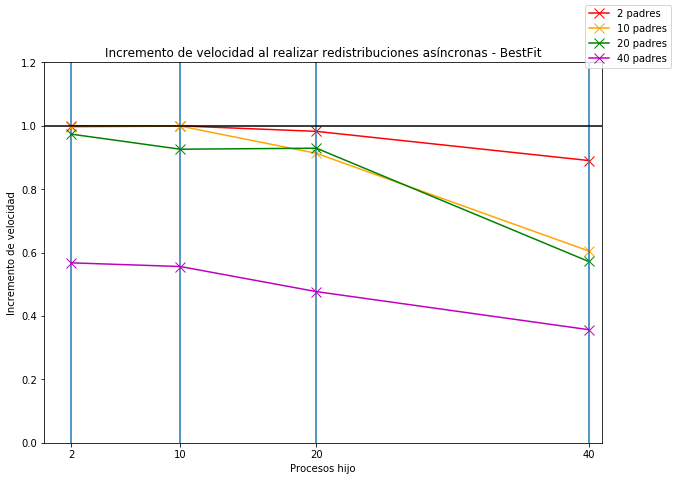

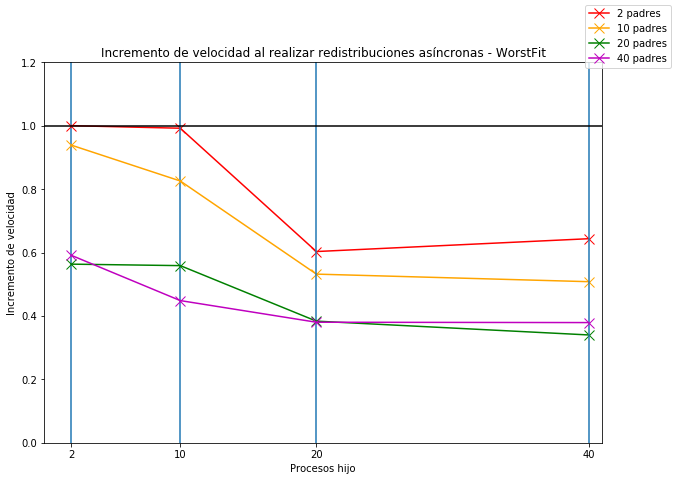

In [99]:
for dist in [1,2]:
    v1 = grouped_aggL.loc[(0,dist,100.0,slice(None))]
    v2 = grouped_aggL.loc[(1,dist,100.0,slice(None))]
    aux_aggL = v1['Ti'].values / v2['Ti'].values

    colors = ['r', 'orange', 'g', 'm', 'y']
    markers = ['+', 'x', '1', '2', 'X']

    f=plt.figure(figsize=(10, 7))
    ax1 = f.add_subplot(111)
    plt.xlim(0, max(values)+1)
    plt.ylim(0, 1.2)
    plt.xticks(values)
    ax1.set_ylabel('Incremento de velocidad')
    ax1.set_xlabel('Procesos hijo')
    ax1.set_title("Incremento de velocidad al realizar redistribuciones asíncronas - " + dist_names[dist])


    for i in range(len(values)):
        numP = values[i]
        c = colors[i]
    
        mini = i * len(values)
        maxi = (i+1) * len(values)
        array_values = aux_aggL[mini:maxi]
        indexes = np.arange(len(values))
        aux_j=0
        for j in range(len(values)):
            indexes[aux_j] = values[j]
            aux_j+=1
    
        x = indexes
        y = array_values
        label = str(numP) + ' padres'
        ax1.axvline(numP)
        plt.plot(x, y, color=colors[i], label=label, marker=markers[1], markersize=10)
    
    ax1.axhline(1, color='k')
    f.legend()
    #f.tight_layout()
    f.savefig("Images/"+"Iters"+ dist_names[dist] +"_SpeedUp", format="png")

In [106]:
TP_data=[0]*len(values)*(len(values))
TH_data=[0]*len(values)*(len(values))
TM_data=[0]*len(values)*(len(values))

TP_A_data=[0]*len(values)*(len(values))
TH_A_data=[0]*len(values)*(len(values))
TM_A_data=[0]*len(values)*(len(values))
#ACTUALMENTE NO SE DIFERENCIAN LOS TIEMPOS DE ITERACIONES DE PADRES E HIJOS CUANDO COINCIDE EL NUMERO DE PROCESOS
if(n_qty == 1):
    groupM_aux = dfM.groupby(['NP', 'NS'])['TC']
    groupL_aux = dfL[dfL['Tt'] == 0].groupby(['NP'])['Ti']
else:
    groupM_aux = dfM.groupby(['NP', 'NS', 'Dist'])['TC']
    groupL_aux = dfL[dfL['Tt'] == 0].groupby(['Dist', 'NP'])['Ti']

grouped_aggM_aux = groupM_aux.agg(['mean'])
grouped_aggM_aux.columns = grouped_aggM_aux.columns.get_level_values(0)

grouped_aggL_aux = groupL_aux.agg(['mean'])
grouped_aggL_aux.columns = grouped_aggL_aux.columns.get_level_values(0)
grouped_aggL_aux.set_axis(['Ti'], axis='columns')


dist=1
dist_v = str(dist)+","+str(dist)
i=0
r=0
for numP in values:
    j=0
    for numC in values:
        
        tc_real = grouped_aggM_aux.loc[(numP,numC,dist_v)]['mean']
        for tipo in [0, 100]:
            iters_aux=dfM[(dfM["NP"] == numP)][(dfM["NS"] == numC)][(dfM["Dist"] == dist_v)][(dfM["%Async"] == tipo)]['Iters'].head(1).tolist()[0].split(',')
            itersP_aux = int(iters_aux[0])
            itersS_aux = int(iters_aux[1])
            iters_mal_aux = 0
            if tipo != 0:
                iters_mal_aux = grouped_aggL['Iters'].loc[(1,dist,tipo,numP,numC)]
            
            t_iterP_aux = grouped_aggL_aux['Ti'].loc[(dist,numP)]
            t_iterS_aux = grouped_aggL_aux['Ti'].loc[(dist,numC)]
            
            
            p1 = t_iterP_aux * itersP_aux
            p2 = t_iterS_aux * max((itersS_aux - iters_mal_aux),0)
                
            array_aux = grouped_aggM[['TS', 'TA']].loc[(dist_v,tipo,numP,numC)].tolist()
            p3 = tc_real + array_aux[0] + array_aux[1]
                
            if tipo == 0:
                TP_data[i*len(values) + j] = p1
                TH_data[i*len(values) + j] = p2
                TM_data[i*len(values) + j] = p3
            else:
                TP_A_data[i*len(values) + j] = p1
                TH_A_data[i*len(values) + j] = p2
                TM_A_data[i*len(values) + j] = p3
        j+=1
    i+=1
print(TP_A_data)
print(TH_A_data)
print(TM_A_data)

[0.19967587612208262, 0.19967587612208262, 0.19967587612208262, 0.19967587612208262, 0.1999576544502616, 0.1999576544502616, 0.1999576544502616, 0.1999576544502616, 0.19993147795414454, 0.19993147795414454, 0.19993147795414454, 0.19993147795414454, 0.2007191721611723, 0.2007191721611723, 0.2007191721611723, 0.2007191721611723]
[1.597407008976661, 1.3997035811518312, 1.3995203456790117, 1.405034205128206, 1.3977311328545783, 1.7996188900523542, 1.5994518236331563, 1.405034205128206, 1.3977311328545783, 1.5996612356020927, 1.5994518236331563, 1.405034205128206, 1.1980552567324958, 1.3997035811518312, 1.3995203456790117, 1.405034205128206]
[0.6347463333333334, 0.8381213999999999, 1.0813388666666666, 1.8329176, 0.8863835999999998, 0.5820358000000001, 0.9037563333333334, 2.330260466666666, 1.0072358000000001, 0.8873689333333334, 1.1739236666666666, 2.9118454666666667, 2.2802995999999998, 2.3853660666666663, 2.754362, 3.621757266666666]


/home/usuario/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: FutureWarning: set_axis currently defaults to operating inplace.
This will change in a future version of pandas, use inplace=True to avoid this warning.
/home/usuario/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


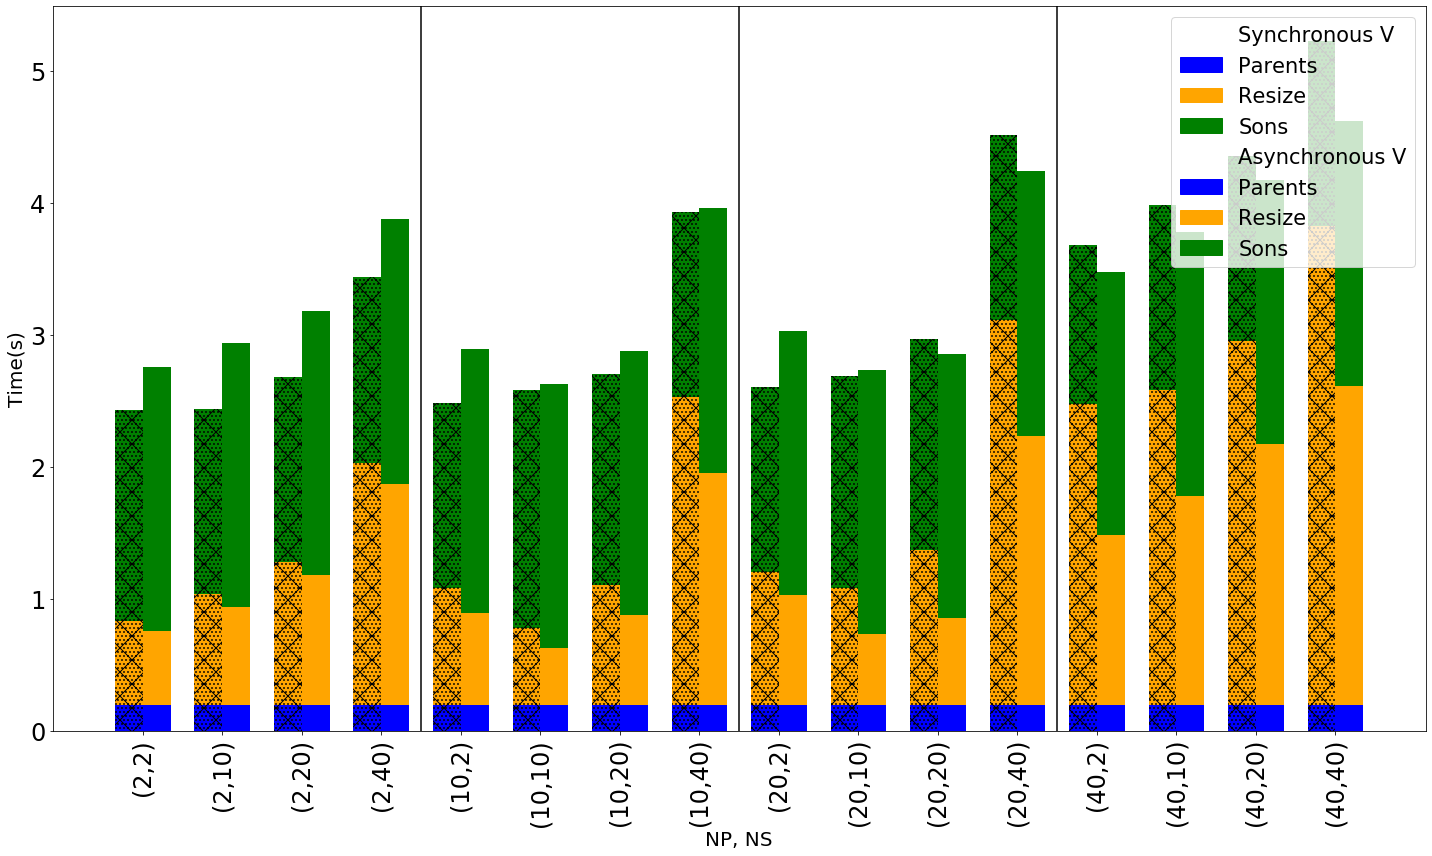

In [107]:
f=plt.figure(figsize=(20, 12))
#for numP in values:

x = np.arange(len(labelsP_J))

width = 0.35
sumaTP_TM = np.add(TP_data, TM_data).tolist()
sumaTP_TM_A = np.add(TP_A_data, TM_A_data).tolist()

ax=f.add_subplot(111)

ax.bar(x+width/2, TP_data, width, color='blue')
ax.bar(x+width/2, TM_data, width, bottom=TP_data,color='orange')
ax.bar(x+width/2, TH_data, width, bottom=sumaTP_TM, color='green')

ax.bar(x-width/2, TP_A_data, width, hatch="\\/...", color='blue')
ax.bar(x-width/2, TM_A_data, width, bottom=TP_A_data, hatch="\\/...", color='orange')
ax.bar(x-width/2, TH_A_data, width, bottom=sumaTP_TM_A, hatch="\\/...", color='green')

ax.set_ylabel("Time(s)", fontsize=20)
ax.set_xlabel("NP, NS", fontsize=20)
plt.xticks(x, labelsP_J, rotation=90)

sync_patch = mpatches.Patch(color='white',label='Synchronous V')
blue_Spatch = mpatches.Patch(color='blue', label='Parents')
orange_Spatch = mpatches.Patch(color='orange', label='Resize')
green_Spatch = mpatches.Patch(color='green', label='Sons')
async_patch = mpatches.Patch(color='white',label='Asynchronous V')
blue_Apatch = mpatches.Patch(hatch='\\/...', color='blue', label='Parents')
orange_Apatch = mpatches.Patch(hatch='\\/...', color='orange', label='Resize')
green_Apatch = mpatches.Patch(hatch='\\/...', color='green', label='Sons')

handles=[sync_patch,blue_Spatch,orange_Spatch,green_Spatch,async_patch,blue_Apatch,orange_Apatch,green_Apatch]

plt.legend(handles=handles, loc='upper right', fontsize=21)
    
ax.axvline((3.5), color='black')
ax.axvline((7.5), color='black')
ax.axvline((11.5), color='black')
    
ax.tick_params(axis='both', which='major', labelsize=24)
ax.tick_params(axis='both', which='minor', labelsize=22)
    #ax.axvline(4)
    
f.tight_layout()
f.savefig("Images/EX_Partitions_"+dist_names[dist]+".png", format="png")
j = (j+1)%5

In [108]:
TC_data=[0]*len(values)*(len(values))
TS_data=[0]*len(values)*(len(values))
TA_data=[0]*len(values)*(len(values))

TC_A_data=[0]*len(values)*(len(values))
TS_A_data=[0]*len(values)*(len(values))
TA_A_data=[0]*len(values)*(len(values))

#FIXME El TC actual no es la media de todos los del mismo tipo

if(n_qty == 1):
    groupM_aux = dfM.groupby(['NP', 'NS'])['TC']
else:
    groupM_aux = dfM.groupby(['NP', 'NS', 'Dist'])['TC']

grouped_aggM_aux = groupM_aux.agg(['mean'])
grouped_aggM_aux.columns = grouped_aggM_aux.columns.get_level_values(0)

dist=1
dist_v = str(dist)+","+str(dist)
i=0
r=0
for numP in values:
    j=0
    for numC in values:
        
        test_tc_real = grouped_aggM_aux.loc[(numP,numC,dist_v)]['mean']
        #print(test_tc_real)
        for tipo in [0, 100]:
            
            test=grouped_aggM.loc[(dist_v,tipo,numP,numC)][['TS', 'TA']]
            test=test.tolist()
                    
            if tipo == 0:
                TC_data[i*len(values) + j] = test_tc_real
                TS_data[i*len(values) + j] = test[0] 
                TA_data[i*len(values) + j] = 0
            else:
                TC_A_data[i*len(values) + j] = test_tc_real
                TS_A_data[i*len(values) + j] = test[0]
                TA_A_data[i*len(values) + j] = test[1]
        j+=1
    i+=1
                    
                    
##########################

print(TC_data)
print(TC_A_data)
#print(TS_data)
#print(TA_data)

[0.23330666666666666, 0.3000864, 0.46798120000000004, 1.0002442666666667, 0.2698616, 0.3514898000000001, 0.538622, 1.2814994666666664, 0.3155408, 0.39067860000000004, 0.613136, 1.4615621333333333, 0.4981289333333334, 0.8814400666666666, 1.0837216666666667, 1.4631459333333334]
[0.23330666666666666, 0.3000864, 0.46798120000000004, 1.0002442666666667, 0.2698616, 0.3514898000000001, 0.538622, 1.2814994666666664, 0.3155408, 0.39067860000000004, 0.613136, 1.4615621333333333, 0.4981289333333334, 0.8814400666666666, 1.0837216666666667, 1.4631459333333334]


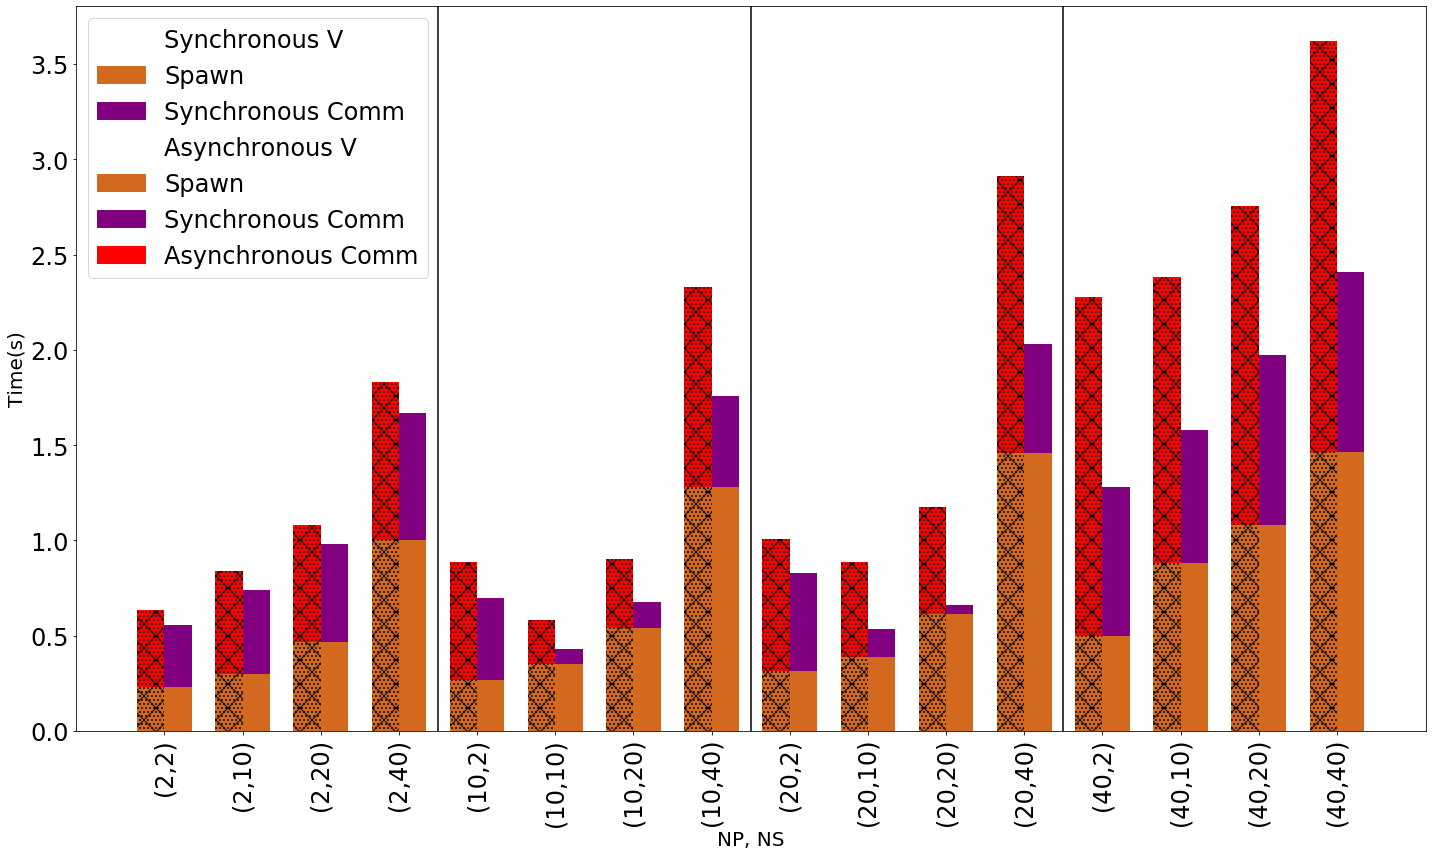

In [109]:
f=plt.figure(figsize=(20, 12))

x = np.arange(len(labelsP_J))
width = 0.35
sumaTC_TS_A = np.add(TC_A_data, TS_A_data).tolist()

ax=f.add_subplot(111)

ax.bar(x+width/2, TC_data, width, color='chocolate')
ax.bar(x+width/2, TS_data, width, bottom=TC_data, color='purple')

ax.bar(x-width/2, TC_A_data, width, hatch="\\/...", color='chocolate')
ax.bar(x-width/2, TS_A_data, width, bottom=TC_A_data, hatch="\\/...", color='purple')
ax.bar(x-width/2, TA_A_data, width, bottom=sumaTC_TS_A, hatch="\\/...", color='red')

ax.set_ylabel("Time(s)", fontsize=20)
ax.set_xlabel("NP, NS", fontsize=20)
plt.xticks(x, labelsP_J, rotation=90)

sync_patch = mpatches.Patch(color='white',label='Synchronous V')
brown_Spatch = mpatches.Patch(color='chocolate', label='Spawn')
purple_Spatch = mpatches.Patch(color='purple', label='Synchronous Comm')
async_patch = mpatches.Patch(color='white',label='Asynchronous V')
brown_Apatch = mpatches.Patch(hatch='\\/...', color='chocolate', label='Spawn')
purple_Apatch = mpatches.Patch(hatch='\\/...', color='purple', label='Synchronous Comm')
red_Apatch = mpatches.Patch(hatch='\\/...', color='red', label='Asynchronous Comm')

handles=[sync_patch,brown_Spatch,purple_Spatch,async_patch,brown_Apatch,purple_Apatch,red_Apatch]

plt.legend(handles=handles, loc='upper left', fontsize=24)

    
ax.axvline((3.5), color='black')
ax.axvline((7.5), color='black')
ax.axvline((11.5), color='black')
    
ax.tick_params(axis='both', which='major', labelsize=24)
ax.tick_params(axis='both', which='minor', labelsize=22)
    #ax.axvline(4)
    
f.tight_layout()
f.savefig("Images/Malt_Partitions_"+dist_names[dist]+".png", format="png")
j = (j+1)%5

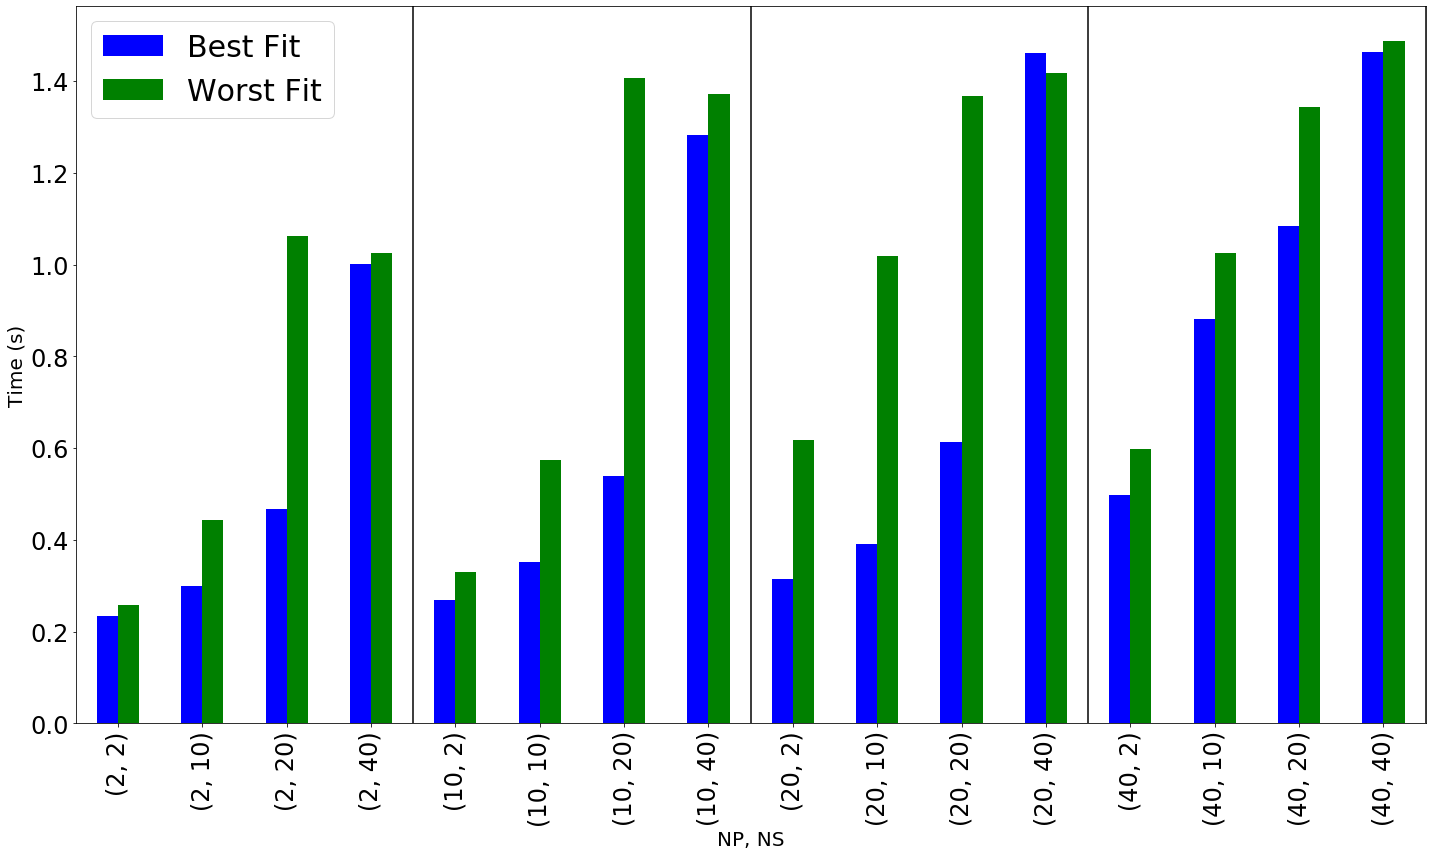

In [104]:
if(n_qty == 1):
    groupM_aux = dfM.groupby(['NP', 'NS'])['TC']
else:
    groupM_aux = dfM.groupby(['NP', 'NS', 'Dist'])['TC']

grouped_aggM_aux = groupM_aux.agg(['mean'])
grouped_aggM_aux.columns = grouped_aggM_aux.columns.get_level_values(0)

j = 0
f=plt.figure(figsize=(20, 12))
    
ax=f.add_subplot(111)
grouped_aggM_aux.unstack().plot(kind='bar', color=['b', 'g'], ax=ax) 
ax.set_ylabel("Time (s)", fontsize=20)
ax.set_xlabel("NP, NS", fontsize=20)
ax.legend(["Best Fit", "Worst Fit"], fontsize=30);

ax.axvline((3.5), color='black')
ax.axvline((7.5), color='black')
ax.axvline((11.5), color='black')
ax.axvline((15.5), color='black')
    
ax.tick_params(axis='both', which='major', labelsize=24)
ax.tick_params(axis='both', which='minor', labelsize=22)
    
f.tight_layout()
f.savefig("Images/TCR_Tiempo_Barras.png", format="png")
j = (j+1)%5

Para Tipo = 1
Para Tipo = 2


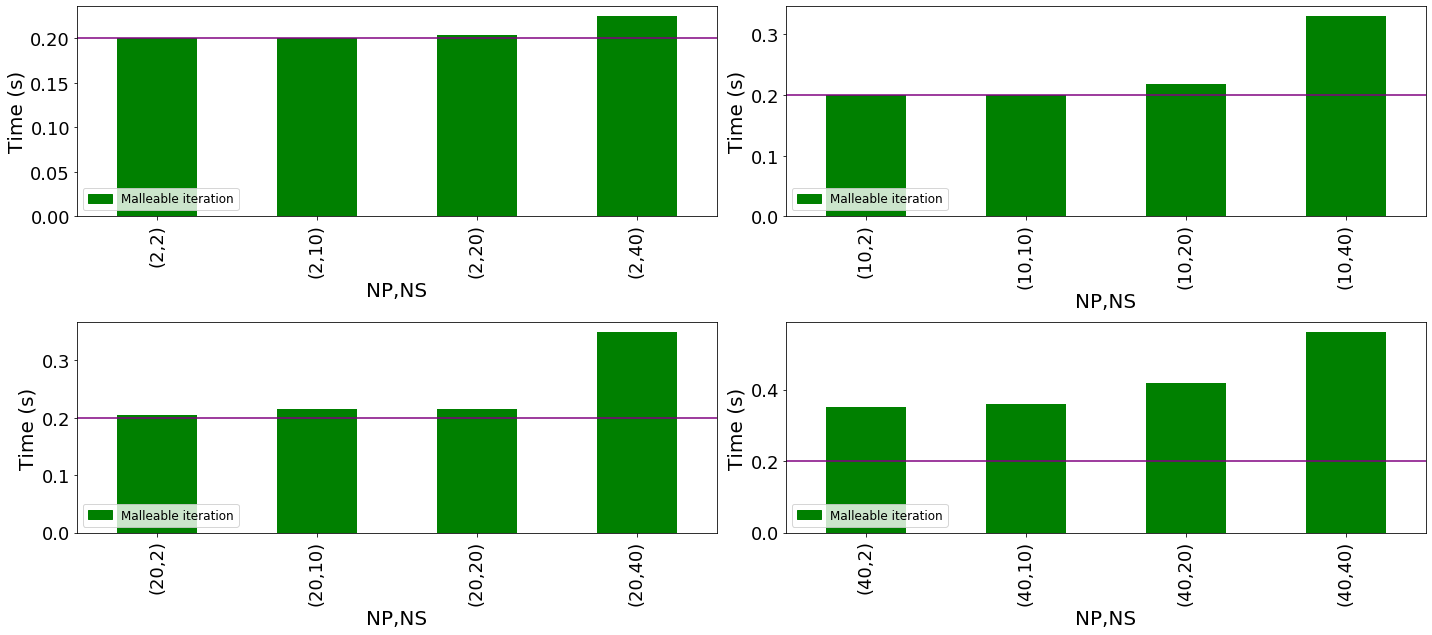

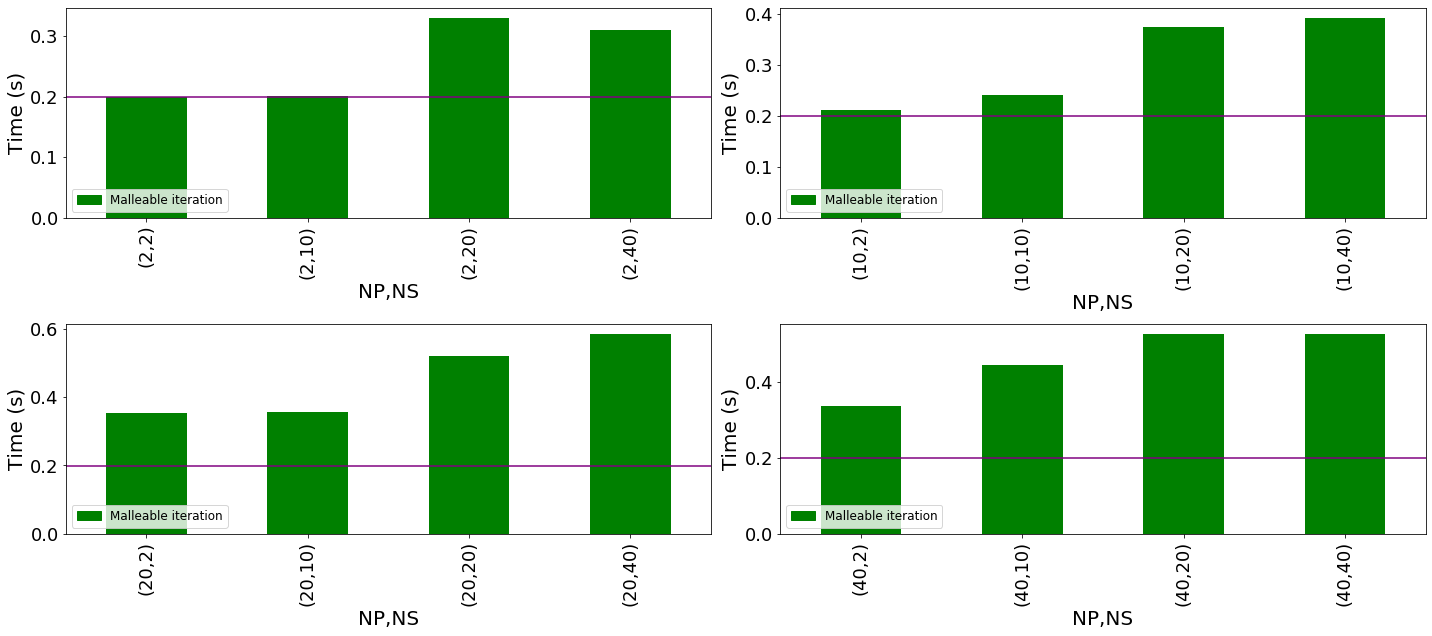

In [105]:
for i in range(1,3):
    print("Para Tipo = " + str(i))
    
    j = 0
    f=plt.figure(figsize=(20, 12))
    numC =2 
    for numP in values:

        ax=f.add_subplot(positions[j])
        
        t_par = grouped_aggL['Ti'].loc[(0,i,100,numP,slice(None))].mean()
        grouped_aggL['Ti'].loc[(1,i,100,numP,slice(None))].plot(kind='bar',color='green', ax=ax) 
        
        ax.axhline(y=t_par, xmin=0, xmax=1, color='purple')
        ax.set_ylabel("Time (s)", fontsize=20)
        ax.set_xlabel("NP,NS", fontsize=20)
        ax.tick_params(axis='both', which='major', labelsize=18)
        ax.tick_params(axis='both', which='minor', labelsize=22)
        
        locs, labels_aux = plt.xticks()
        plt.xticks(locs, labels=labelsP[j], rotation=90)
        
        
        blue_patch = mpatches.Patch(color='green', label='Malleable iteration')
        handles=[blue_patch]
        plt.legend(handles=handles, loc='lower left', fontsize=12)
        
        f.tight_layout()
        f.savefig("Images/Iter_type="+dist_names[i]+"_Perc_type="+str(100)+".png", format="png")
        j = (j+1)%5